Zuveir Jameer

Imperial College

18 December 2023

#### Case Study: Ride Sharing Analysis

#### Business Understanding 
You may have some experience of traveling to and from the airport. Have you ever used Uber/Lyft or any other cab service for this trip? Did you ‌face the problem of cancellation by the driver or non-availability of cars?
These problems also affect the ride companies, as their revenue is tied to the trips made. 
We will investigate this problem of non availability and cancellation

#### Business Objectives
The aim of analysis is to identify the root cause of the problem (i.e. cancellation and non-availability of cars) and recommend ways to improve the situation. 
As a result of your analysis, you should be able to highlight the root cause(s) and possible hypotheses of the problem(s) and recommend ways to improve them.

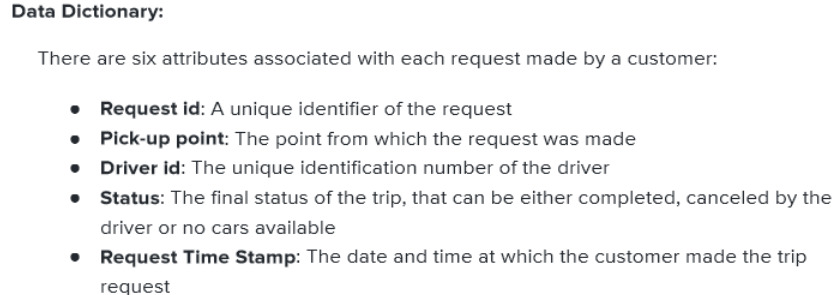

### Action
Action
1. Drivers prefer to work in the morning instead of afternoons and nights
2. Speak to the drivers who are in the top 75% quartile of trip cancellation to understand their working patterns
3. There are many City cancellation after a drop at the Airport. Could it be that the driver have trouble getting back (traffic jams) to the City and fulfilling the request?
4. Why is there such a variation in number trips made by driver from 6 to 22 in the period. 
5. Confirm whether this shows a lack of drivers for Airport. Most of the drivers prefer city jobs.
6. Confirm whether the drivers just work part-time or are also working with other providers, hence the cancellation and low number of trips
7. The duration of trips for Airport and City are similar. Is it that drivers prefer City because there is less distance covered. Does not explain high rates of cancellation.

Overview
1. The data is 2 weeks in a month for 3 non consecutive months
2. Average journey time is the same for Airport and City pickups (86 minutes). That is a surprise.
3. There was an issue with the data at around 11pm on 7th December 2016. This data was removed.

Drivers
1. There are 300 drivers and all of them cover both Airport and City pickups
2. 5 drivers have never cancelled a trip
3. Average driver cancellation is 4 trips
4. 25% of drivers have cancelled between 6-12 trips
5. 36 drivers are above 75% quartile cancellation
6. The maximum number of trips by drivers is 22 trips. Minimum is 6 trips in the period.
7. There are twice more City pickups than Airport pickups
8. Average number of trips in a week is ++++++++++

Trips
1. Main issue for Airport request is that there is no car available (53%). This is more than the completed trips. Cancellation is negligible (6%)
2. However, the main issue for City request is cancellation (30%) and cars not available (27%)
3. Only 40% of trip fulfilled. 39% of the requests were not fulfilled and 18% of trip cancelled. 
4. There is more demand in the second week of the month for both Airport and City trips
5. There is more cancellations on Wednesdays
6. Demand for Airport is more even
7. Demand for City trip is more for Wednesday and Friday
8. At the airport the demand is more in the evening 7pm-10pm and for the city the demand is more in the morning 5-9am
9. Most cancellations are between 5-9am
10. Highest unavailability of cars is between 7-9pm.

In [76]:
import pandas as pd

In [77]:
url="https://raw.githubusercontent.com/vkoul/data/main/misc/ride_data.csv"
df=pd.read_csv(url, parse_dates=["Request timestamp", "Drop timestamp"])

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Request id         6745 non-null   int64         
 1   Pickup point       6745 non-null   object        
 2   Driver id          4095 non-null   float64       
 3   Status             6745 non-null   object        
 4   Request timestamp  6745 non-null   datetime64[ns]
 5   Drop timestamp     2831 non-null   datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(1), object(2)
memory usage: 316.3+ KB


In [79]:
df

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,1,Airport,285.0,Trip Completed,2016-11-07 00:20:00,2016-11-07 00:51:00
1,2,Airport,NaN,No Cars Available,2016-11-07 00:23:00,NaT
2,3,Airport,80.0,Trip Completed,2016-11-07 00:24:00,2016-11-07 01:31:00
3,4,City,NaN,No Cars Available,2016-11-07 00:37:00,NaT
4,5,Airport,264.0,Trip Completed,2016-11-07 00:36:00,2016-11-07 01:35:00
...,...,...,...,...,...,...
6740,6762,Airport,267.0,Trip Completed,2016-07-15 00:07:00,2016-07-15 00:52:00
6741,6763,City,224.0,Trip Completed,2016-07-15 00:04:00,2016-07-15 01:06:00
6742,6764,City,243.0,Trip Completed,2016-07-15 00:06:00,2016-07-15 01:17:00
6743,6765,Airport,NaN,No Cars Available,2016-07-15 00:09:00,NaT


#### Percentage of data missing

df.isna().sum() / df.shape[0]*100


In [80]:
df.isna().mean()*100 #The results suggest that 39% of requested trips are not fulfilled

Request id            0.000000
Pickup point          0.000000
Driver id            39.288362
Status                0.000000
Request timestamp     0.000000
Drop timestamp       58.028169
dtype: float64

#### Check for duplicates

In [81]:
df.duplicated().sum()

0

#### Rename columns, set them to lowercase and replace space with underscore _

In [82]:
df.columns = df.columns.str.lower()

In [83]:
df.columns = df.columns.str.replace(' ','_')

In [84]:
df

,request_id,pickup_point,driver_id,status,request_timestamp,drop_timestamp
0,1,Airport,285.0,Trip Completed,2016-11-07 00:20:00,2016-11-07 00:51:00
1,2,Airport,NaN,No Cars Available,2016-11-07 00:23:00,NaT
2,3,Airport,80.0,Trip Completed,2016-11-07 00:24:00,2016-11-07 01:31:00
3,4,City,NaN,No Cars Available,2016-11-07 00:37:00,NaT
4,5,Airport,264.0,Trip Completed,2016-11-07 00:36:00,2016-11-07 01:35:00
...,...,...,...,...,...,...
6740,6762,Airport,267.0,Trip Completed,2016-07-15 00:07:00,2016-07-15 00:52:00
6741,6763,City,224.0,Trip Completed,2016-07-15 00:04:00,2016-07-15 01:06:00
6742,6764,City,243.0,Trip Completed,2016-07-15 00:06:00,2016-07-15 01:17:00
6743,6765,Airport,NaN,No Cars Available,2016-07-15 00:09:00,NaT


#### Breakup the timestamps to make calculation easier

In [85]:
df['request_year']=df['request_timestamp'].dt.year
df['request_month']=df['request_timestamp'].dt.month
df['request_day']=df['request_timestamp'].dt.day
df['request_day_of_week']=df['request_timestamp'].dt.dayofweek
df['request_hour']=df['request_timestamp'].dt.hour

In [86]:
df['drop_year']=df['drop_timestamp'].dt.year
df['drop_month']=df['drop_timestamp'].dt.month
df['drop_day']=df['drop_timestamp'].dt.day
df['drop_hour']=df['drop_timestamp'].dt.hour

In [87]:
dw_mapping={
    0: 'Monday', 
    1: 'Tuesday', 
    2: 'Wednesday', 
    3: 'Thursday', 
    4: 'Friday',
    5: 'Saturday', 
    6: 'Sunday'
} 

In [88]:
df['request_day_of_week_name']=df['request_timestamp'].dt.weekday.map(dw_mapping)

#### Calculate duration of trip

In [89]:
df['duration']=(df['drop_timestamp'] - df['request_timestamp'])

In [90]:
df

,request_id,pickup_point,driver_id,status,request_timestamp,drop_timestamp,request_year,request_month,request_day,request_day_of_week,request_hour,drop_year,drop_month,drop_day,drop_hour,request_day_of_week_name,duration
0,1,Airport,285.0,Trip Completed,2016-11-07 00:20:00,2016-11-07 00:51:00,2016,11,7,0,0,2016.0,11.0,7.0,0.0,Monday,0 days 00:31:00
1,2,Airport,NaN,No Cars Available,2016-11-07 00:23:00,NaT,2016,11,7,0,0,NaN,NaN,NaN,NaN,Monday,NaT
2,3,Airport,80.0,Trip Completed,2016-11-07 00:24:00,2016-11-07 01:31:00,2016,11,7,0,0,2016.0,11.0,7.0,1.0,Monday,0 days 01:07:00
3,4,City,NaN,No Cars Available,2016-11-07 00:37:00,NaT,2016,11,7,0,0,NaN,NaN,NaN,NaN,Monday,NaT
4,5,Airport,264.0,Trip Completed,2016-11-07 00:36:00,2016-11-07 01:35:00,2016,11,7,0,0,2016.0,11.0,7.0,1.0,Monday,0 days 00:59:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6740,6762,Airport,267.0,Trip Completed,2016-07-15 00:07:00,2016-07-15 00:52:00,2016,7,15,4,0,2016.0,7.0,15.0,0.0,Friday,0 days 00:45:00
6741,6763,City,224.0,Trip Completed,2016-07-15 00:04:00,2016-07-15 01:06:00,2016,7,15,4,0,2016.0,7.0,15.0,1.0,Friday,0 days 01:02:00
6742,6764,City,243.0,Trip Completed,2016-07-15 00:06:00,2016-07-15 01:17:00,2016,7,15,4,0,2016.0,7.0,15.0,1.0,Friday,0 days 01:11:00
6743,6765,Airport,NaN,No Cars Available,2016-07-15 00:09:00,NaT,2016,7,15,4,0,NaN,NaN,NaN,NaN,Friday,NaT


Calculate the difference between two dates in hours

To calculate the time difference between the two dates in seconds we can divide the total_seconds() value by 60 to obtain the minutes, then divide by 60 again to obtain the time difference in hours. We can then assign the time difference in hours to a new column in the dataframe.

In [91]:
df['handling_duration']=(df['drop_timestamp'] - df['request_timestamp']).dt.total_seconds() / 60 / 60

#### Dataframe cleanup
Find duration greater than 2 hours

In [92]:
df[df['handling_duration'] > 2]

,request_id,pickup_point,driver_id,status,request_timestamp,drop_timestamp,request_year,request_month,request_day,request_day_of_week,request_hour,drop_year,drop_month,drop_day,drop_hour,request_day_of_week_name,duration,handling_duration
1319,1320,City,174.0,Trip Completed,2016-11-07 22:52:00,2016-12-07 00:06:00,2016,11,7,0,22,2016.0,12.0,7.0,0.0,Monday,29 days 01:14:00,697.233333
1320,1321,Airport,166.0,Trip Completed,2016-11-07 23:01:00,2016-12-07 00:05:00,2016,11,7,0,23,2016.0,12.0,7.0,0.0,Monday,29 days 01:04:00,697.066667
1323,1324,City,177.0,Trip Completed,2016-11-07 22:59:00,2016-12-07 00:05:00,2016,11,7,0,22,2016.0,12.0,7.0,0.0,Monday,29 days 01:06:00,697.100000
1325,1326,Airport,113.0,Trip Completed,2016-11-07 23:06:00,2016-12-07 00:07:00,2016,11,7,0,23,2016.0,12.0,7.0,0.0,Monday,29 days 01:01:00,697.016667
1329,1330,Airport,99.0,Trip Completed,2016-11-07 23:11:00,2016-12-07 00:14:00,2016,11,7,0,23,2016.0,12.0,7.0,0.0,Monday,29 days 01:03:00,697.050000
1332,1333,City,296.0,Trip Completed,2016-11-07 23:17:00,2016-12-07 00:15:00,2016,11,7,0,23,2016.0,12.0,7.0,0.0,Monday,29 days 00:58:00,696.966667
1338,1339,Airport,108.0,Trip Completed,2016-11-07 23:25:00,2016-12-07 00:32:00,2016,11,7,0,23,2016.0,12.0,7.0,0.0,Monday,29 days 01:07:00,697.116667
1340,1341,Airport,172.0,Trip Completed,2016-11-07 23:26:00,2016-12-07 00:06:00,2016,11,7,0,23,2016.0,12.0,7.0,0.0,Monday,29 days 00:40:00,696.666667
1342,1343,City,237.0,Trip Completed,2016-11-07 23:37:00,2016-12-07 00:32:00,2016,11,7,0,23,2016.0,12.0,7.0,0.0,Monday,29 days 00:55:00,696.916667
1343,1344,City,96.0,Trip Completed,2016-11-07 23:35:00,2016-12-07 00:39:00,2016,11,7,0,23,2016.0,12.0,7.0,0.0,Monday,29 days 01:04:00,697.066667


The above data show that just before midnight on 07-12-2016 there was an issue with the system which logged duration of trips at around 29 hours. This issue was for trips booked at bother City and Airport

In [93]:
df[df['handling_duration'] < 0]

,request_id,pickup_point,driver_id,status,request_timestamp,drop_timestamp,request_year,request_month,request_day,request_day_of_week,request_hour,drop_year,drop_month,drop_day,drop_hour,request_day_of_week_name,duration,handling_duration
2647,2657,Airport,296.0,Trip Completed,2016-12-07 23:11:00,2016-07-13 00:28:00,2016,12,7,2,23,2016.0,7.0,13.0,0.0,Wednesday,-148 days +01:17:00,-3550.716667
2648,2658,Airport,161.0,Trip Completed,2016-12-07 23:18:00,2016-07-13 00:03:00,2016,12,7,2,23,2016.0,7.0,13.0,0.0,Wednesday,-148 days +00:45:00,-3551.250000
2651,2661,Airport,16.0,Trip Completed,2016-12-07 23:23:00,2016-07-13 00:27:00,2016,12,7,2,23,2016.0,7.0,13.0,0.0,Wednesday,-148 days +01:04:00,-3550.933333
2652,2662,Airport,256.0,Trip Completed,2016-12-07 23:22:00,2016-07-13 00:12:00,2016,12,7,2,23,2016.0,7.0,13.0,0.0,Wednesday,-148 days +00:50:00,-3551.166667
2654,2664,Airport,69.0,Trip Completed,2016-12-07 23:26:00,2016-07-13 00:01:00,2016,12,7,2,23,2016.0,7.0,13.0,0.0,Wednesday,-148 days +00:35:00,-3551.416667
2655,2665,Airport,55.0,Trip Completed,2016-12-07 23:30:00,2016-07-13 00:37:00,2016,12,7,2,23,2016.0,7.0,13.0,0.0,Wednesday,-148 days +01:07:00,-3550.883333
2656,2666,City,210.0,Trip Completed,2016-12-07 23:40:00,2016-07-13 00:22:00,2016,12,7,2,23,2016.0,7.0,13.0,0.0,Wednesday,-148 days +00:42:00,-3551.300000
2657,2667,Airport,25.0,Trip Completed,2016-12-07 23:35:00,2016-07-13 00:40:00,2016,12,7,2,23,2016.0,7.0,13.0,0.0,Wednesday,-148 days +01:05:00,-3550.916667
2658,2668,Airport,228.0,Trip Completed,2016-12-07 23:35:00,2016-07-13 00:16:00,2016,12,7,2,23,2016.0,7.0,13.0,0.0,Wednesday,-148 days +00:41:00,-3551.316667
2665,2675,Airport,15.0,Trip Completed,2016-12-07 23:43:00,2016-07-13 00:35:00,2016,12,7,2,23,2016.0,7.0,13.0,0.0,Wednesday,-148 days +00:52:00,-3551.133333


The above data show that just before midnight on 07-12-2016 there was an issue with the system which logged duration of trips at around 29 hours. This issue was for trips booked at bother City and Airport

Clean-up the data with duration less than zero and duration around 29 days

In [94]:
df.drop(df[(df['handling_duration'] < 0)|(df['handling_duration'] > 2)].index,inplace=True)

The data below show information for the second week of the month to the second week of the month. We have data mostly for the month 7 (July), then 11 (November) and then 12 (December)

In [95]:
df.describe()

,request_id,driver_id,request_year,request_month,request_day,request_day_of_week,request_hour,drop_year,drop_month,drop_day,drop_hour,duration,handling_duration
count,6713.000000,4063.000000,6713.0,6713.000000,6713.000000,6713.000000,6713.000000,2799.0,2799.000000,2799.000000,2799.000000,2799,2799.000000
mean,3391.816922,149.531135,2016.0,8.767019,11.251601,2.211381,12.909132,2016.0,8.812433,11.189353,13.025366,0 days 00:52:22.743837084,0.872984
std,1956.469439,86.085266,0.0,2.215909,3.483916,1.335377,6.482816,0.0,2.224251,3.512952,6.368065,0 days 00:13:50.875707615,0.230799
min,1.000000,1.000000,2016.0,7.000000,7.000000,0.000000,0.000000,2016.0,7.000000,7.000000,0.000000,0 days 00:21:00,0.350000
25%,1702.000000,75.000000,2016.0,7.000000,7.000000,2.000000,7.000000,2016.0,7.000000,7.000000,8.000000,0 days 00:41:00,0.683333
50%,3403.000000,149.000000,2016.0,7.000000,13.000000,2.000000,13.000000,2016.0,7.000000,13.000000,13.000000,0 days 00:52:00,0.866667
75%,5088.000000,224.000000,2016.0,11.000000,14.000000,3.000000,19.000000,2016.0,11.000000,14.000000,19.000000,0 days 01:04:00,1.066667
max,6766.000000,300.000000,2016.0,12.000000,15.000000,4.000000,23.000000,2016.0,12.000000,16.000000,23.000000,0 days 01:23:00,1.383333


In [96]:
df.describe(include='O') #For object types

,pickup_point,status,request_day_of_week_name
count,6713,6713,6713
unique,2,3,4
top,City,Trip Completed,Wednesday
freq,3496,2799,2631


#### There are a lot of cancelled trip. I presume that the trip has been cancelled by the driver or the customer

In [97]:
pd.crosstab(df['status'],df['pickup_point'])

pickup_point,Airport,City
status,,
Cancelled,198,1066
No Cars Available,1713,937
Trip Completed,1306,1493


#### Trip Status
39% of the requests were not fulfilled and 18% of trip cancelled. Only 40% of trip fulfilled

In [98]:
df['status'].value_counts(normalize= True)

Trip Completed       0.416952
No Cars Available    0.394756
Cancelled            0.188291
Name: status, dtype: float64

##### However, cancellation for airport trips is negligible. Lack of cars is a main issue. Drivers are not available for Airport pickup

In [99]:
AirportDf = df[df.loc[:,'pickup_point'] == "Airport"]
AirportDf['status'].value_counts(normalize= True)

No Cars Available    0.532484
Trip Completed       0.405968
Cancelled            0.061548
Name: status, dtype: float64

#### A lot of the trip in the City are cancelled (30%)

In [100]:
CityDf = df[df.loc[:,'pickup_point'] == "City"]
CityDf['status'].value_counts(normalize= True)

Trip Completed       0.427059
Cancelled            0.304920
No Cars Available    0.268021
Name: status, dtype: float64

#### The two queries above achieved through crosstab.
Unavailability of cars is a bigger problem at the airport as shown above

In [101]:
pd.crosstab(df['status'],df['pickup_point'],normalize='columns').round(2)

pickup_point,Airport,City
status,,
Cancelled,0.06,0.30
No Cars Available,0.53,0.27
Trip Completed,0.41,0.43


The statuses are stable across the different days

In [147]:
pd.crosstab(df['status'],df['request_day'],normalize='columns').round(2)

request_day,7,13,14,15
status,,,,
Cancelled,0.19,0.20,0.19,0.17
No Cars Available,0.38,0.37,0.42,0.42
Trip Completed,0.43,0.43,0.39,0.41


Most cancellations are between 5-9am
Highest unavailability of cars is between 7-9pm.

<AxesSubplot: xlabel='request_hour'>

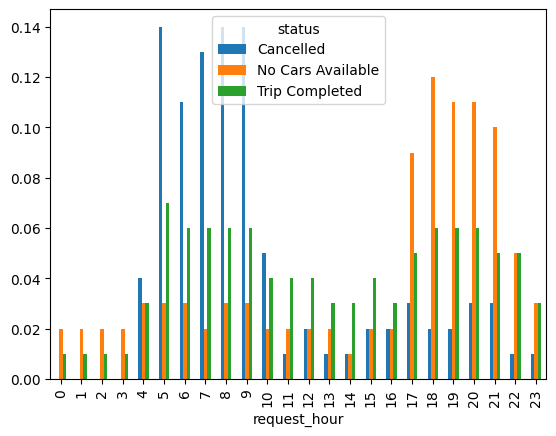

In [152]:
pd.crosstab(df['request_hour'],df['status'],normalize='columns').round(2).plot(kind='bar')

<AxesSubplot: xlabel='request_day', ylabel='handling_duration'>

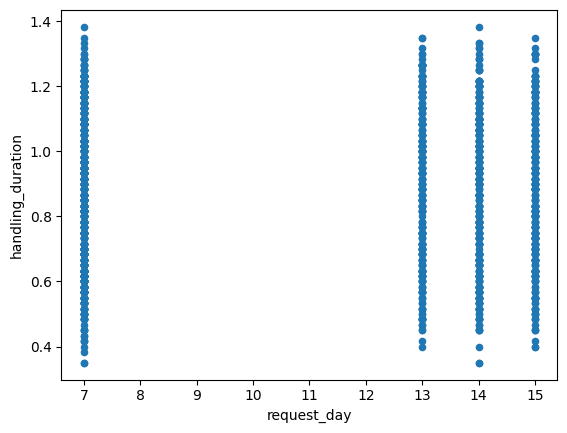

In [168]:
df[(df['pickup_point']=='City')].plot(kind='scatter', x='request_day', y='handling_duration')

##### There are more drivers at the City pickup point than at the airport.

#### Adding a column with the total count of drivers as shown above
https://towardsdatascience.com/when-to-use-pandas-transform-function-df8861aa0dcf

In [102]:
df2 = df.groupby(['pickup_point'])['driver_id'].count()

In [103]:
df2

pickup_point
Airport    1504
City       2559
Name: driver_id, dtype: int64

In [104]:
df['total_driver'] = df.groupby(['pickup_point'])['driver_id'].transform('count')

In [105]:
df

,request_id,pickup_point,driver_id,status,request_timestamp,drop_timestamp,request_year,request_month,request_day,request_day_of_week,request_hour,drop_year,drop_month,drop_day,drop_hour,request_day_of_week_name,duration,handling_duration,total_driver
0,1,Airport,285.0,Trip Completed,2016-11-07 00:20:00,2016-11-07 00:51:00,2016,11,7,0,0,2016.0,11.0,7.0,0.0,Monday,0 days 00:31:00,0.516667,1504
1,2,Airport,NaN,No Cars Available,2016-11-07 00:23:00,NaT,2016,11,7,0,0,NaN,NaN,NaN,NaN,Monday,NaT,NaN,1504
2,3,Airport,80.0,Trip Completed,2016-11-07 00:24:00,2016-11-07 01:31:00,2016,11,7,0,0,2016.0,11.0,7.0,1.0,Monday,0 days 01:07:00,1.116667,1504
3,4,City,NaN,No Cars Available,2016-11-07 00:37:00,NaT,2016,11,7,0,0,NaN,NaN,NaN,NaN,Monday,NaT,NaN,2559
4,5,Airport,264.0,Trip Completed,2016-11-07 00:36:00,2016-11-07 01:35:00,2016,11,7,0,0,2016.0,11.0,7.0,1.0,Monday,0 days 00:59:00,0.983333,1504
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6740,6762,Airport,267.0,Trip Completed,2016-07-15 00:07:00,2016-07-15 00:52:00,2016,7,15,4,0,2016.0,7.0,15.0,0.0,Friday,0 days 00:45:00,0.750000,1504
6741,6763,City,224.0,Trip Completed,2016-07-15 00:04:00,2016-07-15 01:06:00,2016,7,15,4,0,2016.0,7.0,15.0,1.0,Friday,0 days 01:02:00,1.033333,2559
6742,6764,City,243.0,Trip Completed,2016-07-15 00:06:00,2016-07-15 01:17:00,2016,7,15,4,0,2016.0,7.0,15.0,1.0,Friday,0 days 01:11:00,1.183333,2559
6743,6765,Airport,NaN,No Cars Available,2016-07-15 00:09:00,NaT,2016,7,15,4,0,NaN,NaN,NaN,NaN,Friday,NaT,NaN,1504


#### There are 300 drivers

In [106]:
df['driver_id'].nunique()

300

#### All 300 drivers are attending both Airport and City requests   

In [107]:
df.groupby(['pickup_point'])['driver_id'].nunique()

pickup_point
Airport    300
City       300
Name: driver_id, dtype: int64

##### However, as shown below demand is nearly the same at both Aiport and City 

In [108]:
df.groupby(['pickup_point'], as_index=False)['request_id'].count() #added  as_index=False to remove index and display the result in a table.

,pickup_point,request_id
0,Airport,3217
1,City,3496


#### The average duration of a trip is nearly the same for Airport and City. That is a surprise. Need to dig a bit more in this. Are there outliers?

In [109]:
df.groupby(['pickup_point'])['handling_duration'].mean()

pickup_point
Airport    0.870329
City       0.875307
Name: handling_duration, dtype: float64

The duration of the trip in the city and airport is similar.

In [170]:
df.groupby(['pickup_point'])['handling_duration'].describe()

,count,mean,std,min,25%,50%,75%,max
pickup_point,,,,,,,,
Airport,1306.0,0.870329,0.230754,0.35,0.683333,0.866667,1.066667,1.366667
City,1493.0,0.875307,0.230890,0.35,0.683333,0.883333,1.066667,1.383333


#### A further drilldown into the average duration of trips per pickup point and per day is unimpressive. Despite the long distance of Airport trip, City trip are on average taking similar duration, in traffic presumably

In [110]:
df.groupby(['pickup_point', 'request_day_of_week'])['handling_duration'].mean()

pickup_point  request_day_of_week
Airport       0                      0.868389
              2                      0.865972
              3                      0.873473
              4                      0.879415
City          0                      0.871972
              2                      0.878879
              3                      0.872468
              4                      0.875427
Name: handling_duration, dtype: float64

On a daily basis, duration is also fairly constant

In [171]:
df.groupby(['pickup_point', 'request_day_of_week'])['handling_duration'].describe()

count      mean       std       min  \
pickup_point request_day_of_week                                        
Airport      0                    271.0  0.868389  0.224670  0.366667   
             2                    576.0  0.865972  0.235414  0.350000   
             3                    191.0  0.873473  0.228388  0.433333   
             4                    268.0  0.879415  0.229363  0.433333   
City         0                    311.0  0.871972  0.229721  0.383333   
             2                    550.0  0.878879  0.232971  0.350000   
             3                    339.0  0.872468  0.234484  0.350000   
             4                    293.0  0.875427  0.225021  0.400000   

                                       25%       50%       75%       max  
pickup_point request_day_of_week                                          
Airport      0                    0.683333  0.850000  1.066667  1.316667  
             2                    0.666667  0.866667  1.066667  1.350000  
             3                    0.716667  0.866667  1.050000  1.350000  
             4                    0.700000  0.866667  1.066667  1.366667  
City         0                    0.683333  0.850000  1.066667  1.350000  
             2                    0.683333  0.883333  1.050000  1.383333  
             3                    0.666667  0.900000  1.066667  1.383333  
             4                    0.700000  0.883333  1.050000  1.350000

#### Analyse Driver perfermonce

#### The maximum number of journeys by drivers is 22 based in the dataset. Minimum is 6 which is low

In [111]:
df['driver_id'].value_counts(dropna=True)

27.0     22
84.0     21
70.0     21
22.0     21
176.0    21
         ..
117.0     8
42.0      7
123.0     7
300.0     6
265.0     6
Name: driver_id, Length: 300, dtype: int64

Some drivers have a high level number of cancellation. Need to calculated the mean and the SD.

In [112]:
candf=df[df['status'] == 'Cancelled']
candf.groupby('driver_id')['driver_id'].count().sort_values()

driver_id
300.0     1
18.0      1
188.0     1
46.0      1
26.0      1
         ..
166.0     9
206.0    10
142.0    10
54.0     11
84.0     12
Name: driver_id, Length: 295, dtype: int64

In [113]:
crossdf=pd.crosstab(candf['driver_id'],candf['status'])

In [114]:
crossdf.sort_values(by='Cancelled')

status,Cancelled
driver_id,
300.0,1
18.0,1
188.0,1
46.0,1
26.0,1
...,...
166.0,9
206.0,10
142.0,10


5 drivers have never cancelled a trip. The rest have cancelled. The average cancellation is 4. 75% of drivers have cancelled 6 trips. 25% have cancelled more than 6 trips with some reaching a maximum of 12 cancellation. 
Action: Need to determine why the drivers are cancelling the trips

In [115]:
crossdf['Cancelled'].describe()

count    295.000000
mean       4.284746
std        1.937880
min        1.000000
25%        3.000000
50%        4.000000
75%        5.500000
max       12.000000
Name: Cancelled, dtype: float64

These are the 36 drivers with cancellation above the 75% quartile

In [116]:
highcanceldf = crossdf.sort_values(by='Cancelled')
highcanceldf[highcanceldf['Cancelled'] > 6]

status,Cancelled
driver_id,
129.0,7
275.0,7
190.0,7
280.0,7
290.0,7
20.0,7
277.0,7
256.0,7
176.0,7


#### This extract shows that drivers are not working everyday. Probably some are working part-time (particular days, time)

In [172]:
df[df['driver_id']==131]

,request_id,pickup_point,driver_id,status,request_timestamp,drop_timestamp,request_year,request_month,request_day,request_day_of_week,request_hour,drop_year,drop_month,drop_day,drop_hour,request_day_of_week_name,duration,handling_duration,total_driver
228,229,City,131.0,Cancelled,2016-11-07 06:23:00,NaT,2016,11,7,0,6,NaN,NaN,NaN,NaN,Monday,NaT,NaN,2559
280,281,City,131.0,Trip Completed,2016-11-07 07:01:00,2016-11-07 08:10:00,2016,11,7,0,7,2016.0,11.0,7.0,8.0,Monday,0 days 01:09:00,1.150000,2559
1678,1683,City,131.0,Cancelled,2016-12-07 07:57:00,NaT,2016,12,7,2,7,NaN,NaN,NaN,NaN,Wednesday,NaT,NaN,2559
1723,1728,City,131.0,Cancelled,2016-12-07 08:20:00,NaT,2016,12,7,2,8,NaN,NaN,NaN,NaN,Wednesday,NaT,NaN,2559
1771,1777,City,131.0,Cancelled,2016-12-07 08:58:00,NaT,2016,12,7,2,8,NaN,NaN,NaN,NaN,Wednesday,NaT,NaN,2559
1862,1868,City,131.0,Cancelled,2016-12-07 09:59:00,NaT,2016,12,7,2,9,NaN,NaN,NaN,NaN,Wednesday,NaT,NaN,2559
1896,1902,City,131.0,Trip Completed,2016-12-07 10:34:00,2016-12-07 11:46:00,2016,12,7,2,10,2016.0,12.0,7.0,11.0,Wednesday,0 days 01:12:00,1.200000,2559
2681,2691,Airport,131.0,Trip Completed,2016-07-13 00:44:00,2016-07-13 01:41:00,2016,7,13,2,0,2016.0,7.0,13.0,1.0,Wednesday,0 days 00:57:00,0.950000,1504
2791,2801,City,131.0,Cancelled,2016-07-13 04:57:00,NaT,2016,7,13,2,4,NaN,NaN,NaN,NaN,Wednesday,NaT,NaN,2559
2907,2920,City,131.0,Cancelled,2016-07-13 06:22:00,NaT,2016,7,13,2,6,NaN,NaN,NaN,NaN,Wednesday,NaT,NaN,2559


In [118]:
df[df['driver_id']==27]

,request_id,pickup_point,driver_id,status,request_timestamp,drop_timestamp,request_year,request_month,request_day,request_day_of_week,request_hour,drop_year,drop_month,drop_day,drop_hour,request_day_of_week_name,duration,handling_duration,total_driver
203,204,City,27.0,Trip Completed,2016-11-07 06:04:00,2016-11-07 06:44:00,2016,11,7,0,6,2016.0,11.0,7.0,6.0,Monday,0 days 00:40:00,0.666667,2559
275,276,City,27.0,Cancelled,2016-11-07 06:52:00,NaT,2016,11,7,0,6,NaN,NaN,NaN,NaN,Monday,NaT,NaN,2559
631,632,Airport,27.0,Trip Completed,2016-11-07 12:20:00,2016-11-07 13:10:00,2016,11,7,0,12,2016.0,11.0,7.0,13.0,Monday,0 days 00:50:00,0.833333,1504
762,763,City,27.0,Trip Completed,2016-11-07 16:19:00,2016-11-07 17:25:00,2016,11,7,0,16,2016.0,11.0,7.0,17.0,Monday,0 days 01:06:00,1.100000,2559
1610,1613,City,27.0,Cancelled,2016-12-07 06:47:00,NaT,2016,12,7,2,6,NaN,NaN,NaN,NaN,Wednesday,NaT,NaN,2559
1780,1786,Airport,27.0,Trip Completed,2016-12-07 09:03:00,2016-12-07 09:58:00,2016,12,7,2,9,2016.0,12.0,7.0,9.0,Wednesday,0 days 00:55:00,0.916667,1504
1960,1968,City,27.0,Trip Completed,2016-12-07 12:10:00,2016-12-07 12:49:00,2016,12,7,2,12,2016.0,12.0,7.0,12.0,Wednesday,0 days 00:39:00,0.650000,2559
2080,2088,Airport,27.0,Trip Completed,2016-12-07 15:51:00,2016-12-07 17:02:00,2016,12,7,2,15,2016.0,12.0,7.0,17.0,Wednesday,0 days 01:11:00,1.183333,1504
2464,2473,Airport,27.0,Trip Completed,2016-12-07 20:43:00,2016-12-07 21:20:00,2016,12,7,2,20,2016.0,12.0,7.0,21.0,Wednesday,0 days 00:37:00,0.616667,1504
2856,2869,Airport,27.0,Trip Completed,2016-07-13 05:50:00,2016-07-13 06:27:00,2016,7,13,2,5,2016.0,7.0,13.0,6.0,Wednesday,0 days 00:37:00,0.616667,1504


In [119]:
df['driver_id'].value_counts(bins=100)

(21.93, 24.92]      56
(174.42, 177.41]    54
(78.74, 81.73]      52
(195.35, 198.34]    51
(222.26, 225.25]    50
                    ..
(54.82, 57.81]      30
(186.38, 189.37]    30
(291.03, 294.02]    30
(9.97, 12.96]       30
(39.87, 42.86]      27
Name: driver_id, Length: 100, dtype: int64

#### We have data for only 2 weeks in a month. This shows requests are at a peak at the beginning of the month in the three months of data that we have for namely July, November and December.

<AxesSubplot: xlabel='request_day'>

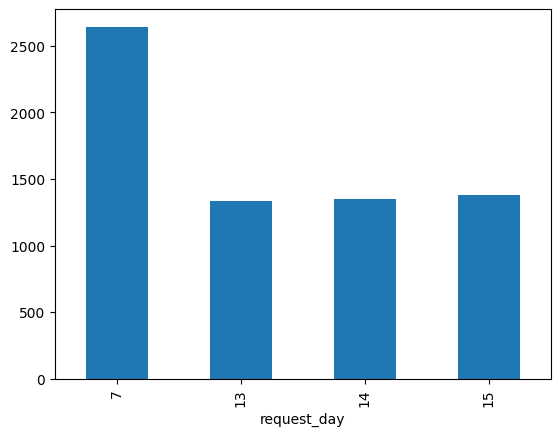

In [120]:
df.groupby(['request_day'])['request_id'].count().plot(kind='bar')

#### We can add as_index=False and this will display a neat table of the groupy 


<AxesSubplot: >

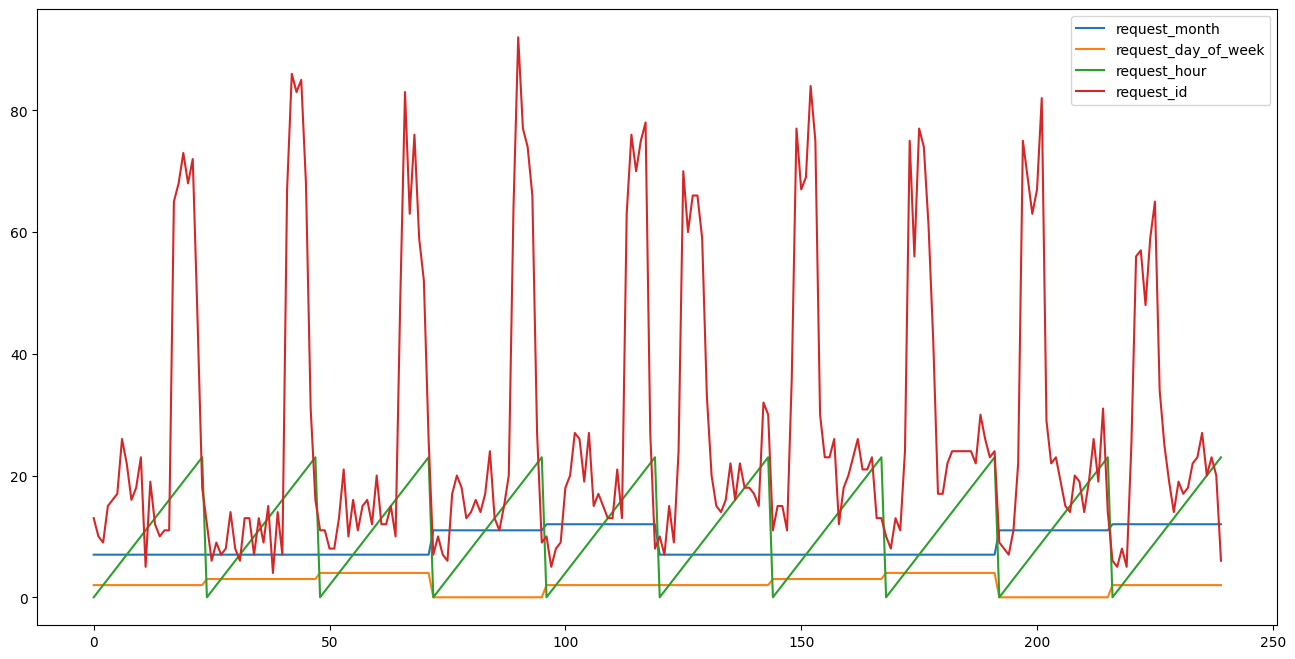

In [121]:
df.groupby(['pickup_point','request_month','request_day_of_week','request_hour'], as_index=False)['request_id'].count().plot(kind='line', figsize=(16, 8))

What day of the month do we have more demand. It would seem that we have more demand around the second week of the month

<AxesSubplot: xlabel='pickup_point,request_day'>

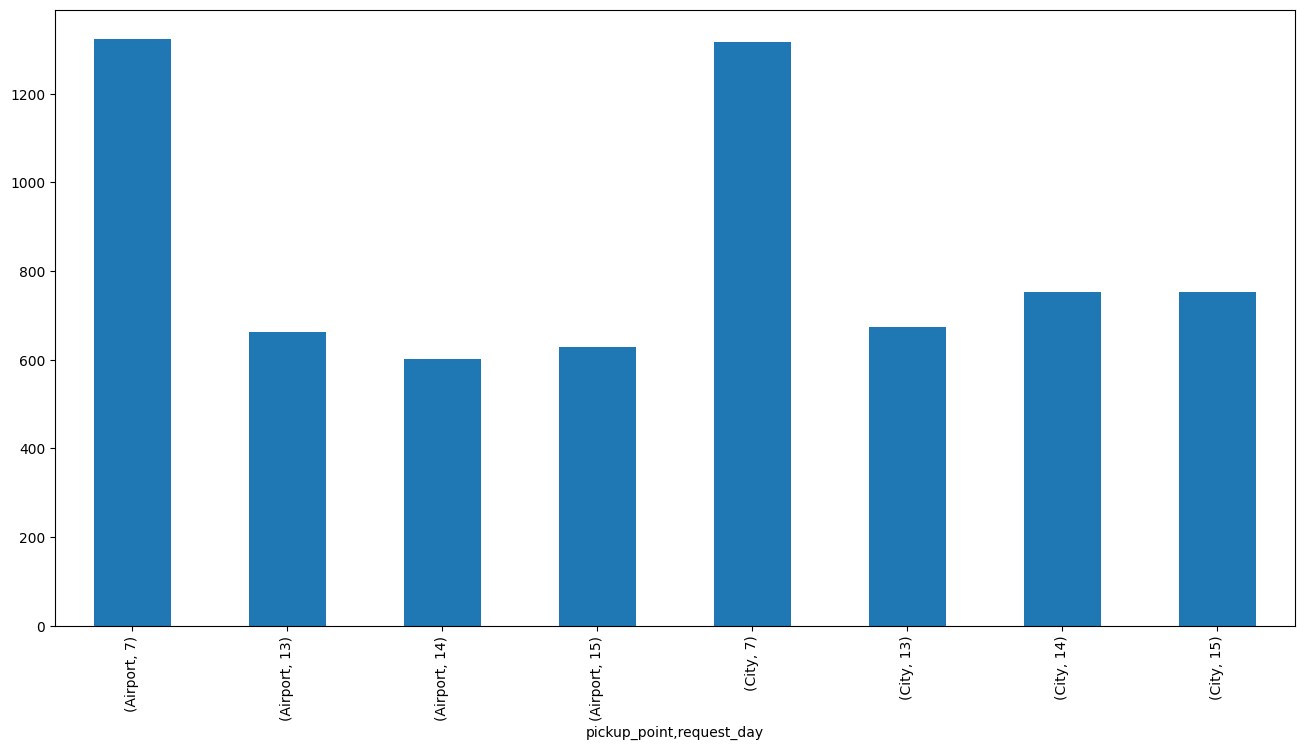

In [122]:
df.groupby(['pickup_point','request_day'])['request_id'].count().plot(kind='bar', figsize=(16, 8))

This is a bit more granular because I have included hour in addition to the day of the month. Demand is at end of first week of the month

<AxesSubplot: xlabel='pickup_point,request_day,request_hour'>

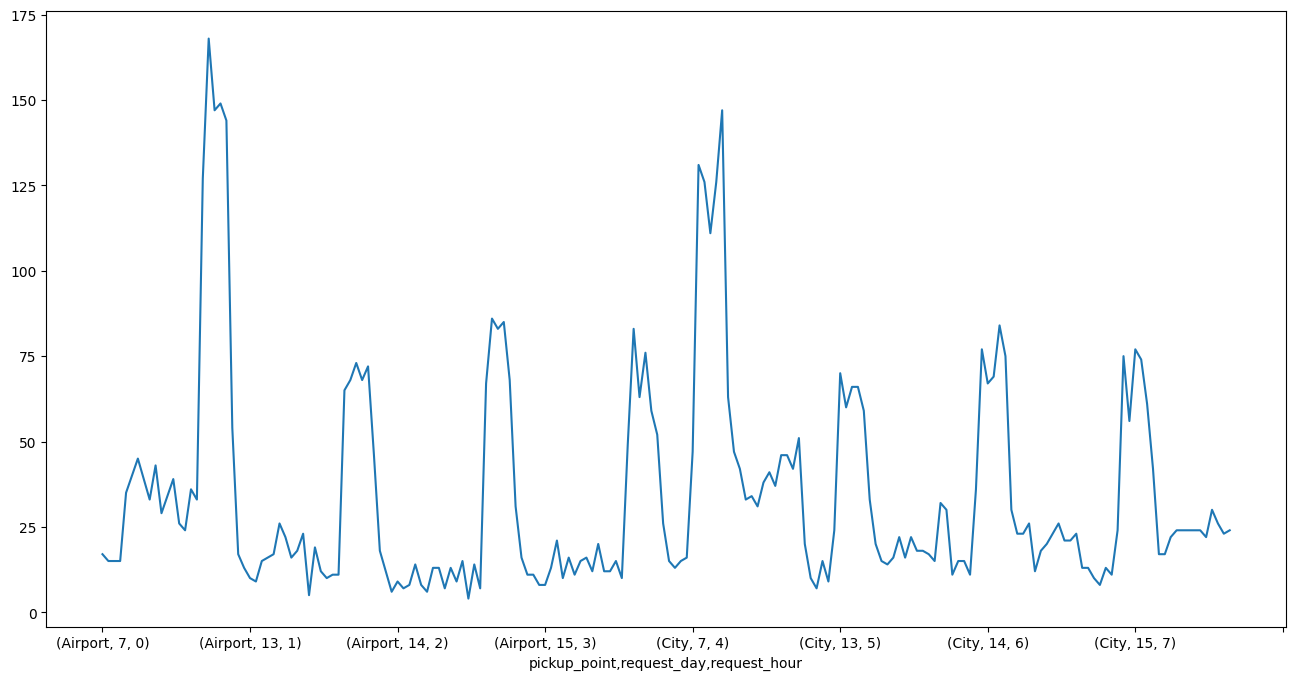

In [123]:
df.groupby(['pickup_point','request_day','request_hour'])['request_id'].count().plot(kind='line', figsize=(16, 8))

What day in the week is there more demand. This shows end of wednesday and beginnging ofThrusday for Airport pickup and
Wednesday for City pickup

<AxesSubplot: xlabel='pickup_point,request_day_of_week_name,request_hour'>

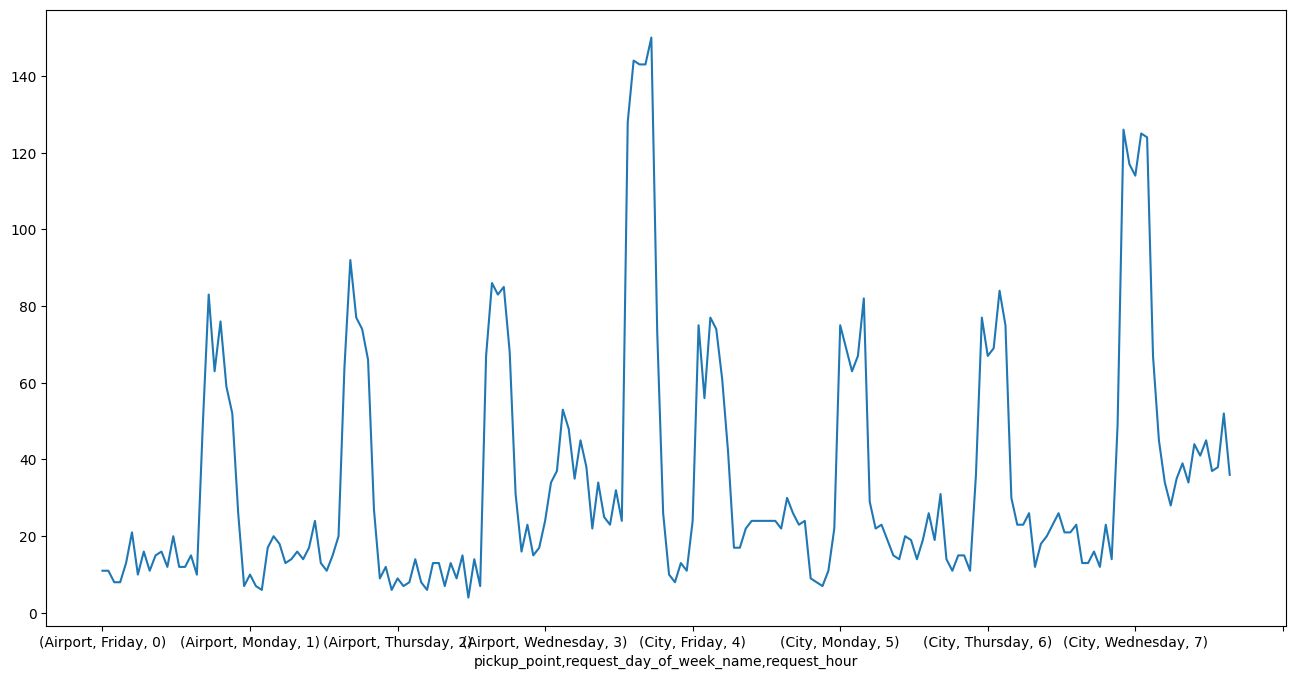

In [135]:
df.groupby(['pickup_point','request_day_of_week_name','request_hour'])['request_id'].count().plot(kind='line', figsize=(16, 8))

#### Adding the name of the day which was mapped earlier

In [143]:
df.sort_values(['pickup_point','request_day_of_week']).groupby(['pickup_point','request_day_of_week','request_day_of_week_name','request_hour'])['request_id'].count()


pickup_point  request_day_of_week  request_day_of_week_name  request_hour
Airport       0                    Monday                    0                7
                                                             1               10
                                                             2                7
                                                             3                6
                                                             4               17
                                                                             ..
City          4                    Friday                    19              22
                                                             20              30
                                                             21              26
                                                             22              23
                                                             23              24
Name: request_id, Length: 192, dtype: int64

#### This is the demand graph

Sorting and then group by

<AxesSubplot: xlabel='pickup_point,request_day_of_week_name,request_hour'>

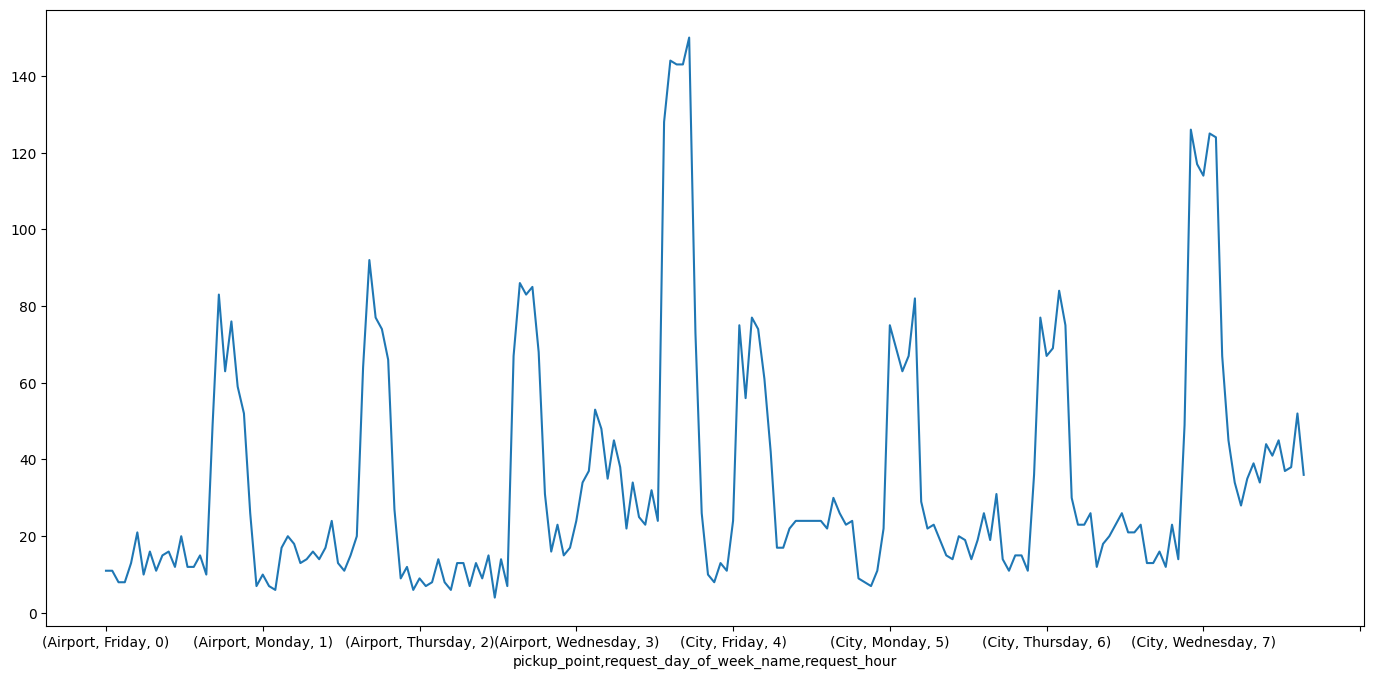

In [146]:
df.sort_values(['pickup_point','request_day_of_week_name'], ascending=True).groupby(['pickup_point','request_day_of_week_name','request_hour'])['request_id'].count().plot(kind='line', figsize=(17, 8))

#### Supply or availability of drivers 
This shows a lack of drivers for Airport. Most of the drivers prefer city jobs. Contrast the graph below with the graph above

<AxesSubplot: xlabel='pickup_point,request_day_of_week,request_day_of_week_name,request_hour'>

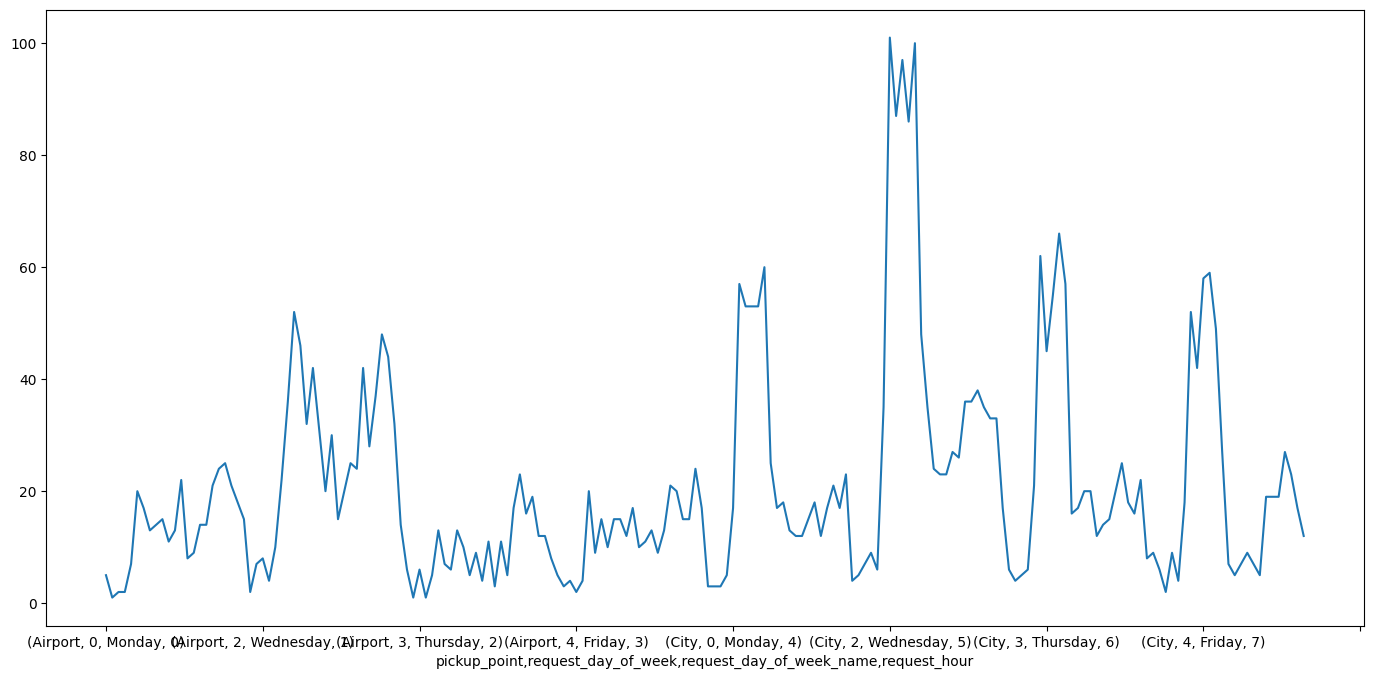

In [127]:
df.groupby(['pickup_point','request_day_of_week','request_day_of_week_name','request_hour'])['driver_id'].count().plot(kind='line', figsize=(17, 8))

At the airport the demand is more in the evening 7pm-10pm and for the city the demand is more in the morning 5-9am

<AxesSubplot: xlabel='pickup_point,request_hour'>

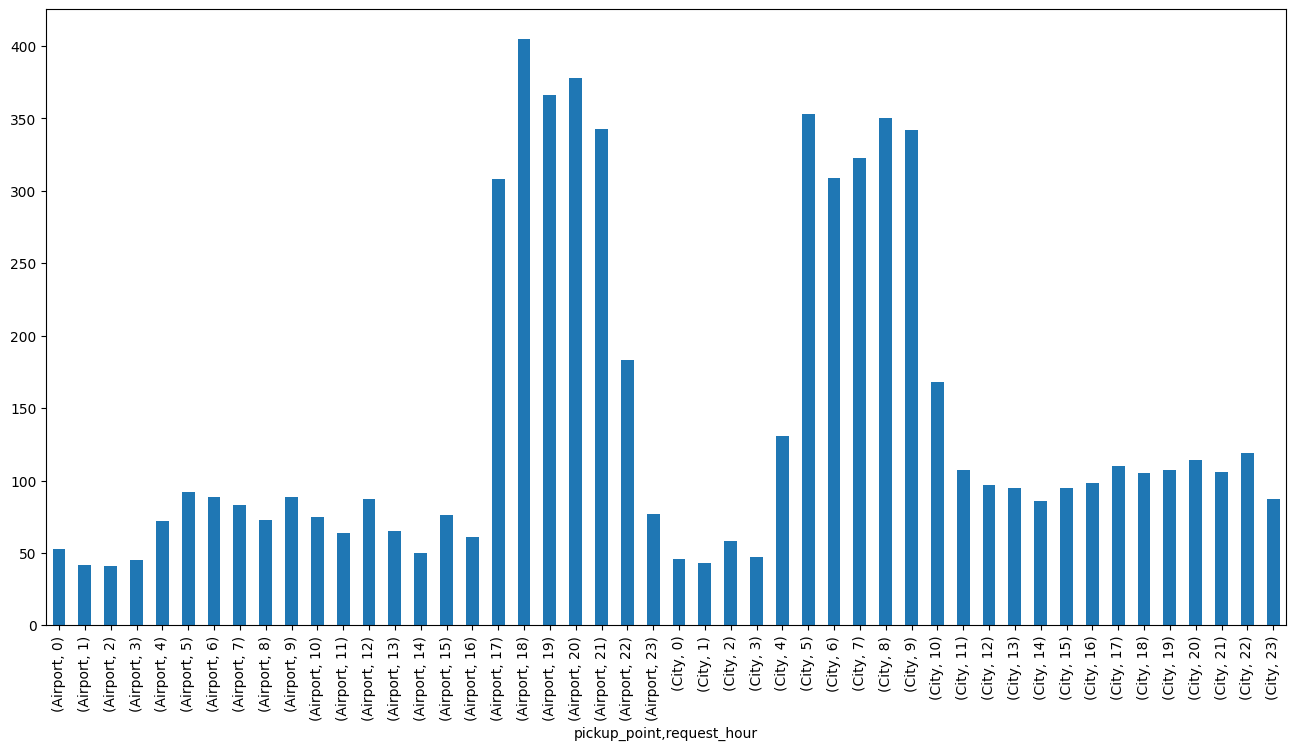

In [128]:
df.groupby(['pickup_point','request_hour'], )['request_id'].count().plot(kind='bar', figsize=(16, 8))

In [129]:
df['pickup_point'].value_counts(normalize=True).round(3)

City       0.521
Airport    0.479
Name: pickup_point, dtype: float64

<AxesSubplot: xlabel='status,pickup_point'>

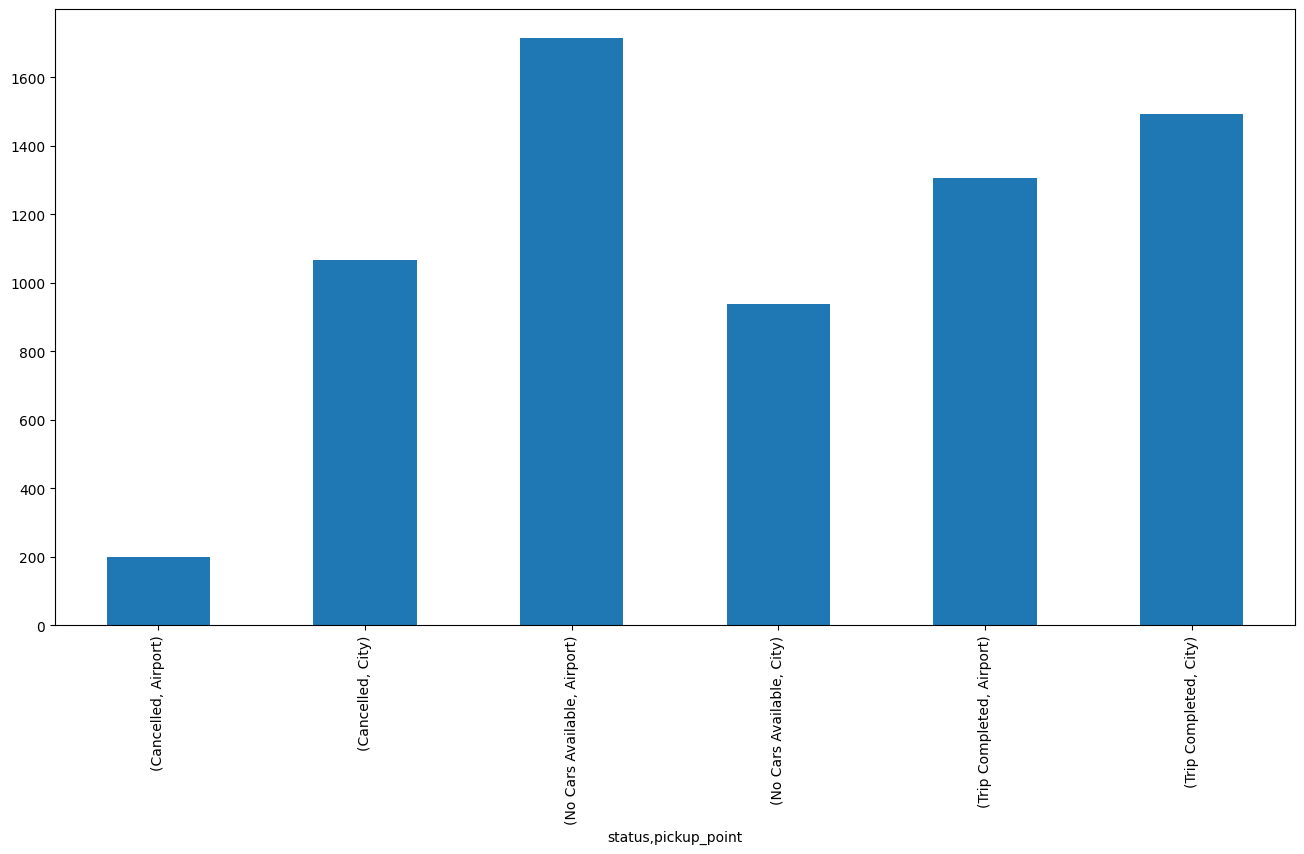

In [130]:
df.groupby(['status','pickup_point'] )['pickup_point'].count().plot(kind='bar', figsize=(16, 8))

In [131]:
df.groupby(['status','pickup_point', 'request_day_of_week'],as_index=False)['request_id'].count()

,status,pickup_point,request_day_of_week,request_id
0,Cancelled,Airport,0,42
1,Cancelled,Airport,2,93
2,Cancelled,Airport,3,32
3,Cancelled,Airport,4,31
4,Cancelled,City,0,220
5,Cancelled,City,2,417
6,Cancelled,City,3,220
7,Cancelled,City,4,209
8,No Cars Available,Airport,0,338
9,No Cars Available,Airport,2,667


#### Most of the cancellations are on Wednesday

<AxesSubplot: xlabel='status,request_day_of_week'>

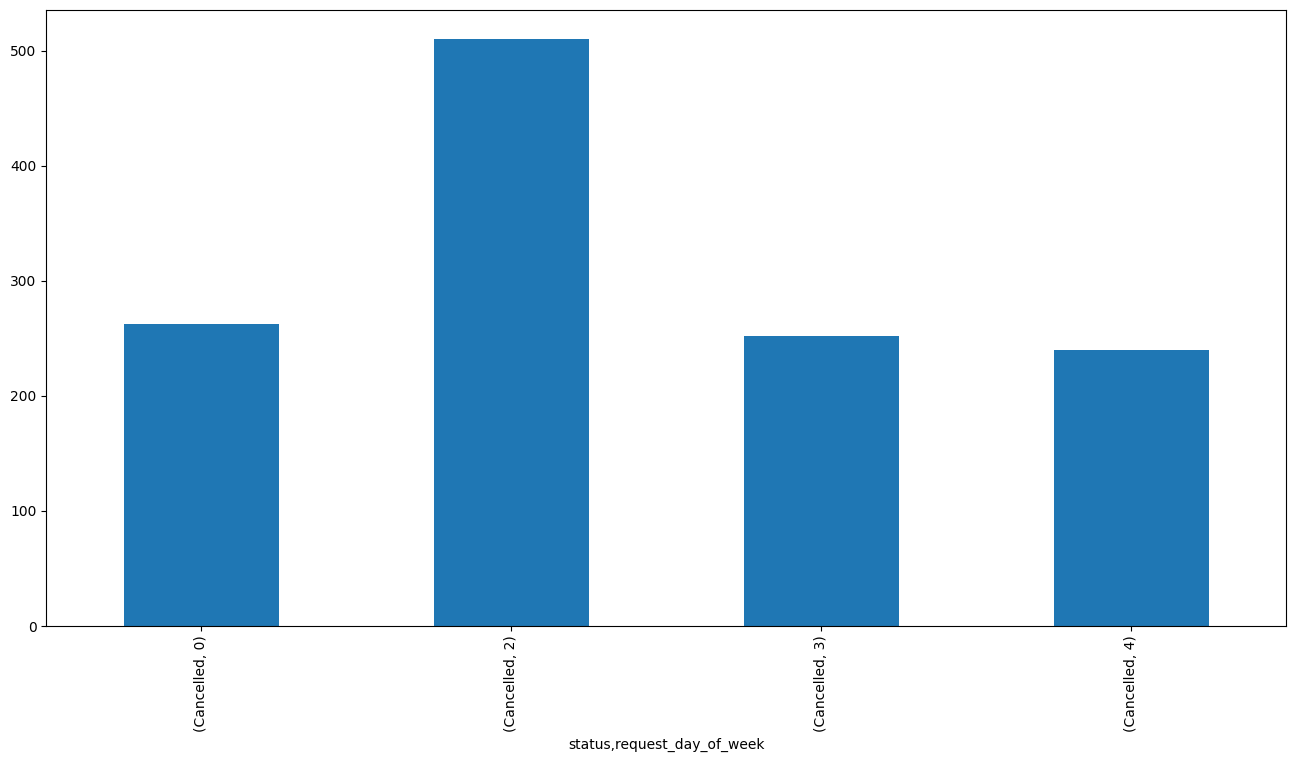

In [132]:

df2=df[df['status'] == 'Cancelled']
df2.groupby(['status', 'request_day_of_week'] )['request_id'].count().plot(kind='bar', figsize=(16, 8))

C:\Users\uzx2\AppData\Local\Temp\ipykernel_20220\173866519.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby(['request_day', 'request_hour'])['driver_id', 'request_id'].count().plot(kind='line', figsize=(16, 8))


<AxesSubplot: xlabel='request_day,request_hour'>

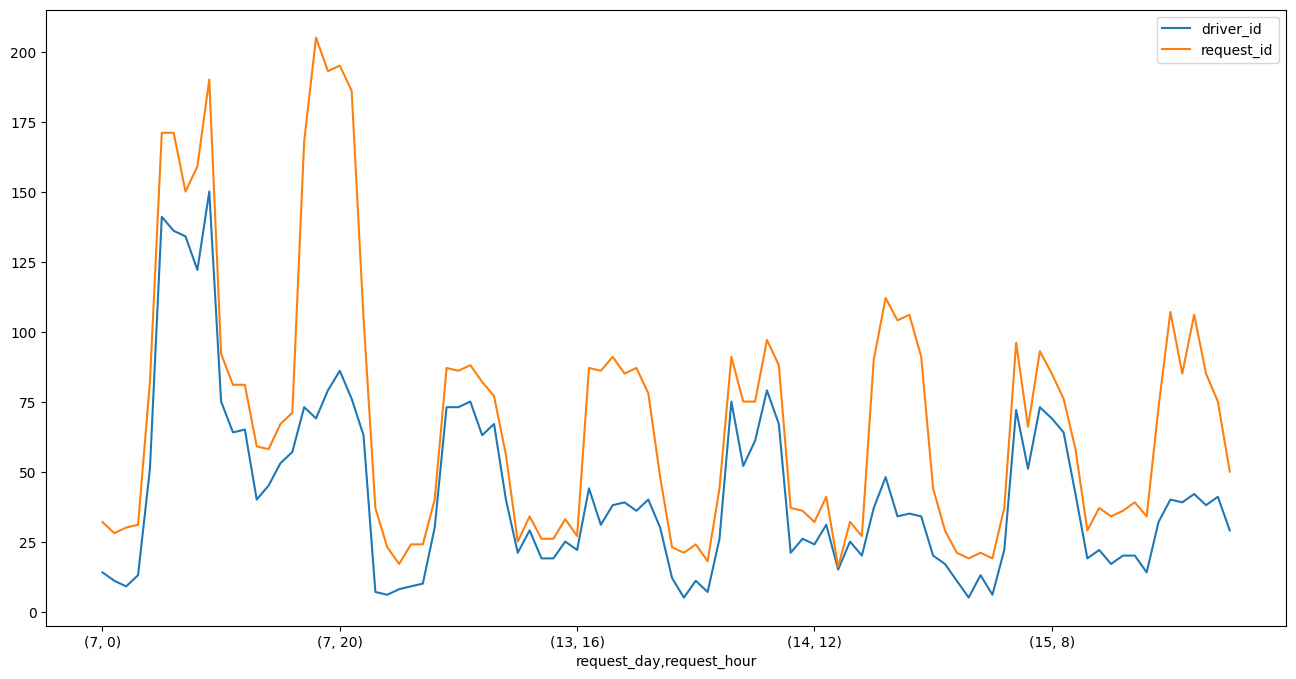

In [187]:
df.groupby(['request_day', 'request_hour'])['driver_id', 'request_id'].count().plot(kind='line', figsize=(16, 8))